In [13]:
# Imports

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
crop_data = pd.read_csv('APY.csv')

In [14]:
crop_data.head()

In [43]:
crop_data.sort_values(['Production'], ascending=False, ignore_index=True)

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Tamil Nadu,COIMBATORE,Coconut,2007,Whole Year,107106.0,1.597800e+09,14917.93
1,Tamil Nadu,COIMBATORE,Coconut,2019,Whole Year,87749.0,1.488200e+09,16959.74
2,Tamil Nadu,COIMBATORE,Coconut,2006,Whole Year,104197.0,1.482900e+09,14231.70
3,Karnataka,TUMAKURU,Coconut,2019,Whole Year,176243.0,1.452725e+09,8242.74
4,Tamil Nadu,COIMBATORE,Coconut,2015,Whole Year,85448.0,1.401300e+09,16399.45
...,...,...,...,...,...,...,...,...
345331,West Bengal,PURBA BARDHAMAN,Moong(Green Gram),2005,Summer,1.0,NaN,0.00
345332,West Bengal,MEDINIPUR WEST,Peas & beans (Pulses),2010,Rabi,2.0,NaN,0.00
345333,West Bengal,PURULIA,Rapeseed &Mustard,2001,Rabi,427.0,NaN,0.00
345334,West Bengal,PURULIA,Rapeseed &Mustard,2002,Rabi,522.0,NaN,0.00


In [4]:
states = list(set(crop_data.State))

In [6]:
def add_plot_details(xlabel, ylabel, title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title) 
    plt.show()

In [9]:
def plot_garlic_production(data):
    states = ['Gujarat', 'Madhya Pradesh', 'Rajasthan', 'Kerala']
    crop_data = data[data['Crop'] == 'Garlic']
    state_wise_graph = crop_data.groupby(by=["State","Crop_Year"])['Production'].mean()
    plt.figure(figsize=(10,6))
    for state in states:
        data = state_wise_graph.xs(state, level='State')
        plt.plot(data, '.-', label=state)
        plt.legend(loc='upper left', ncol = 3)
        plt.xticks(data.index, rotation = 50)
    add_plot_details('Years', 'Production of crop (tonnes)', f'Production of garlic in different states')    

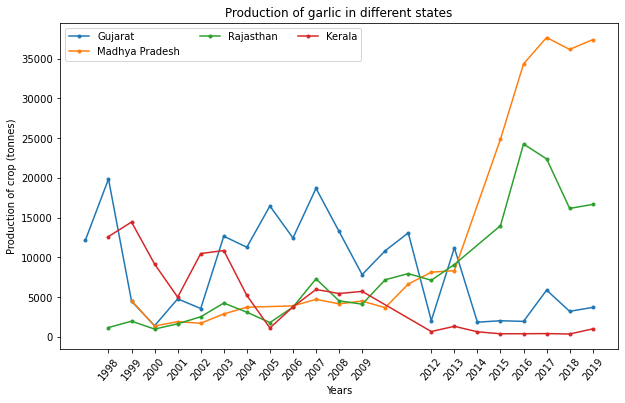

In [10]:
plot_garlic_production(crop_data)

In [11]:
# year 2020 which states had the largest mean production of Tobbacco

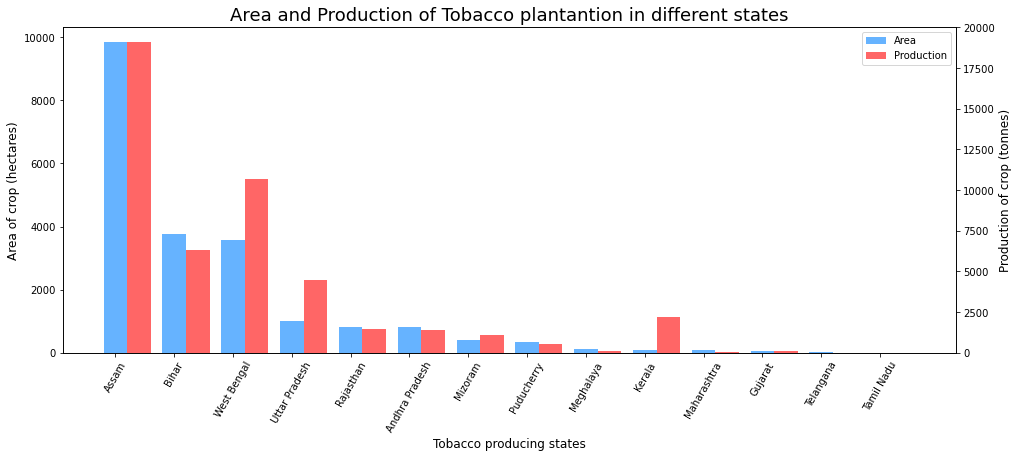

In [15]:
def plot_tobbacco_plantation_area_details(data):
    one_year_data = data[data['Crop_Year'] == 2015]
    one_year_rice_data = one_year_data[one_year_data['Crop'] == 'Tobacco']
    tobacco_states = set(one_year_rice_data.State)
    one_year_rice_data = one_year_rice_data.drop(columns = ['District ', 'Season', 'Crop', 'Crop_Year'])
    one_year_rice_data = one_year_rice_data.groupby('State').mean().sort_values('Area ', ascending = False)
    one_year_rice_data = one_year_rice_data.reset_index()
    fig,ax = plt.subplots(figsize=(16,6))
    ax2 = ax.twinx()
    x_axis = np.arange(len(tobacco_states))
    # plt.figure(figsize=(10,6))
    p1 = ax.bar(x_axis, one_year_rice_data['Area '], width=0.4, label = 'Area', color = ['#66b3ff'])
    p2 = ax2.bar(x_axis +0.20*2, one_year_rice_data['Production'], width=0.4, label = 'Production', color = ['#ff6666'])
    ax.set_xticks(x_axis)#, one_year_rice_data['State'])#, rot = 60)
    ax.set_xticklabels(tobacco_states, rotation = 60)
    ax.set_xlabel('Tobacco producing states', size = 12)
    ax.set_ylabel('Area of crop (hectares)', size=12)
    ax2.set_ylabel('Production of crop (tonnes)', size=12) 
    ax.legend(handles=[p1, p2], loc='best')
    ax.set_title(f"Area and Production of Tobacco plantantion in different states",fontsize=18)
    
plot_tobbacco_plantation_area_details(crop_data)

In [37]:
def plot_top_5_crops_per_state(state_name):
    one_year_data = crop_data[crop_data['Crop_Year'] == 2012]
    one_year_karnataka_data = one_year_data[one_year_data['State'] == state_name]
    one_year_karnataka_data= one_year_karnataka_data.groupby('Crop').mean().sort_values('Production', ascending = False)
    one_year_karnataka_data = one_year_karnataka_data.reset_index()
    one_year_karnataka_data = one_year_karnataka_data.drop(columns = ['Crop_Year', 'Area ', 'Yield'])
    #the top 5
    df2 = one_year_karnataka_data[:5].copy()
    #others
    new_row = pd.DataFrame(data = {
        'Crop' : ['others'],
        'Production' : [one_year_karnataka_data['Production'][5:].sum()]
    })
    df2 = pd.concat([df2, new_row])
    print(df2)
    plot_pie_chart((8,6), df2['Production'], df2['Crop'], f"Top crops in {state_name}") 

In [38]:
def plot_pie_chart(figsize, data, labels, title):    
    plt.figure(figsize=figsize)
    colors = ['#ee82ee', '#7fffd4', '#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
    plt.pie(data, labels = labels,autopct='%1.1f%%', startangle = 10, pctdistance=0.5, explode = [0.05]*len(labels), colors = colors)
    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title)
    plt.show()

In [39]:
def plot_top_northeast_crops():
    north_east_states = ['Manipur', 'Nagaland', 'Arunachal Pradesh', 'Bihar']
    for state in north_east_states:
        plot_top_5_crops_per_state(state)

           Crop    Production
0     Sugarcane  34632.222222
1          Rice  28620.000000
2        Potato  14111.111111
3        Banana   9798.444444
4  Dry chillies   7530.333333
0        others  16065.666667


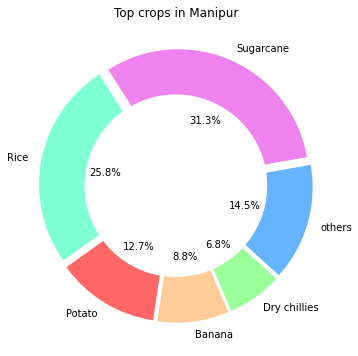

        Crop    Production
0       Rice  28941.428571
1  Sugarcane  17051.818182
2      Maize   7920.588235
3     Potato   6272.727273
4    Tapioca   3619.090909
0     others  14247.881066


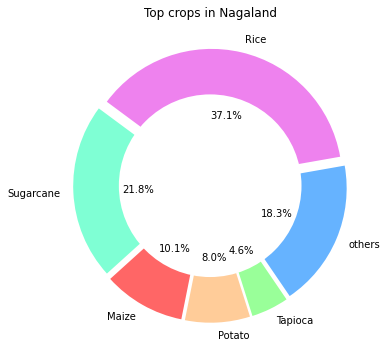

        Crop    Production
0       Rice  10916.375000
1      Maize   4262.000000
2     Ginger   3500.250000
3  Sugarcane   3350.111111
4     Potato   2429.500000
0     others   4576.995833


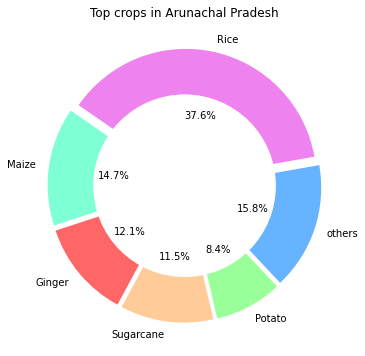

        Crop     Production
0  Sugarcane  364040.428571
1       Jute  165613.111111
2      Wheat  162480.526316
3       Rice   92466.777778
4      Maize   25283.981651
0     others   25956.194789


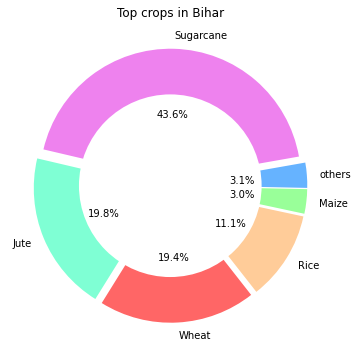

In [40]:
plot_top_northeast_crops()